<a href="https://colab.research.google.com/github/jithumia/jithumia/blob/main/PRE_final%2026%20GY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import numbers
from matplotlib import cm
from itertools import cycle, islice
import os


In [443]:

def List_txt_cli():
    files = os.listdir()   # return a list of files
    files.sort()
    return [file for file in files if file.endswith('LI.txt')]
def List_txt_kbp():
    files = os.listdir()   # return a list of files
    files.sort()
    return [file for file in files if file.endswith('BP.txt')]

def Load_patient(file):  # file = 'Case1_AAA.txt'  string
    with open(file, "r") as file_:
        my_file = [line for line in file_.readlines()]  # my_file is a list representation of the text file
    file_.close()
    file_len = len(my_file)                                # number of lines in the file
    patID = my_file[1].split(':')[-1].strip('\n').strip()
    planID = my_file[10].split(':')[-1].strip('\n').strip()
    ## Get the structures
    structures_indexs_list = []
    structures_names_list  = []
    for i, line in enumerate(my_file):
        if line.startswith('Structure:'):
            structures_indexs_list.append(i)
            structures_names_list.append(line.split(':')[-1].strip('\n').strip())


    ##structures_names_list = ['PTV CHEST', 'Foramen'] # hard code to limit number of structures and prevent memory issues

    print(file + ' loaded \t patID:' + patID + ' PlanID:' + planID + ' and number of structures is ' + str(len(structures_names_list)))
    dose_index = np.linspace(0, 100, 2001)  # New dose index in range 0 - dose Gy in 0.05 Gy steps

    data = np.zeros((dose_index.shape[0], len(structures_names_list)))

    # iterate through all structures and place interpolated DVH data in matrix
    for i, index in enumerate(structures_indexs_list):
        start = structures_indexs_list[i]+24  # first line of DVH data
        if i < len(structures_indexs_list)-1:
            end = structures_indexs_list[i+1]-2  # find the last line of the DVH from the next index, BEWARE THE +1
        else:
            end = len(my_file)-2
        DVH_data = my_file[start:end]  # get list with data

        DVH_list = [line.split() for line in DVH_data]  # create list of lists split
        Rel_dose_pct, Dose_Gy, Ratio_pct = zip(*DVH_list) # unzip to 3 lists, they are strings so conver to float

        Ratio_pct = np.asarray(Ratio_pct, dtype=np.float32)
        Dose_Gy = np.asarray(Dose_Gy, dtype=np.float32)
        ## Now working with dose data

        f = interpolate.interp1d(x=Dose_Gy,y=Ratio_pct, bounds_error=False, fill_value=0)   # returns a linear interpolate function, fill values outside range wiwth 0

        data[:,i] = f(dose_index)

    my_iterables = [structures_names_list]
    my_index = pd.MultiIndex.from_product(my_iterables, names = ['Structure'])

    df = pd.DataFrame(data.T, index = my_index)
    df = df.T
    df.index  = dose_index
    df.index.name = 'Dose (Gy)'
    return df    

def Load_files_to_df(files_list):    # pass a list of files to load into a df
    for i, file in enumerate(files_list):
        if i == 0:
            multi_df = Load_patient(file)
        else:
            multi_df = pd.concat([multi_df, Load_patient(file)], axis=1)
    return multi_df



In [444]:
txt_files_cli = List_txt_cli()
txt_files_cli

['01_CS13837_VIDHI_CLI.txt',
 '02_CR37117_SNEHAL_CLI.txt',
 '03_CN28107_SAVITRI_CLI.txt',
 '04_CR32719_PADMAVATI_CLI.txt',
 '05_CS08259_INDU_CLI.txt',
 '06_CT07223_SHEELABAI_CLI.txt',
 '07_CS41150_JHUMPA_CLI.txt',
 '08_CR22570_RAMKALI_CLI.txt',
 '09_CT08054_JYOTI_CLI.txt',
 '10_CS38821_MARAYAM_CLI.txt',
 '11_CR26428_GAURI_CLI.txt',
 '12_CT50219_SUMITRA_CLI.txt',
 '13_CP34333_MEENAL_CLI.txt']

In [445]:
txt_files_kbp = List_txt_kbp()
txt_files_kbp

['01_CS13837_VIDHI_KBP.txt',
 '02_CR37117_SNEHAL_KBP.txt',
 '03_CN28107_SAVITRI_KBP.txt',
 '04_CR32719_PADMAVATI_KBP.txt',
 '05_CS08259_INDU_KBP.txt',
 '06_CT07223_SHEELABAI_KBP.txt',
 '07_CS41150_JHUMPA_KBP.txt',
 '08_CR22570_RAMKALI_KBP.txt',
 '09_CT08054_JYOTI_KBP.txt',
 '10_CS38821_MARAYAM_KBP.txt',
 '11_CR26428_GAURI_KBP.txt',
 '12_CT50219_SUMITRA_KBP.txt',
 '13_CP34333_MEENAL_KBP.txt']

In [446]:
df_cli = Load_files_to_df(txt_files_cli)

01_CS13837_VIDHI_CLI.txt loaded 	 patID:CS/13837 PlanID:Clinical_26 and number of structures is 12
02_CR37117_SNEHAL_CLI.txt loaded 	 patID:CR/37117 PlanID:Clinical26 and number of structures is 12
03_CN28107_SAVITRI_CLI.txt loaded 	 patID:CN/28107 PlanID:CLINI_FINAL26 and number of structures is 12
04_CR32719_PADMAVATI_CLI.txt loaded 	 patID:CR/32719 PlanID:Clinical26 and number of structures is 12
05_CS08259_INDU_CLI.txt loaded 	 patID:CS/08259 PlanID:Clinical26 and number of structures is 12
06_CT07223_SHEELABAI_CLI.txt loaded 	 patID:CT/07223 PlanID:Clinical_26 and number of structures is 12
07_CS41150_JHUMPA_CLI.txt loaded 	 patID:CS/41150 PlanID:Clini_plan26 and number of structures is 12
08_CR22570_RAMKALI_CLI.txt loaded 	 patID:CR/22570 PlanID:Clinfinal26Gy and number of structures is 12
09_CT08054_JYOTI_CLI.txt loaded 	 patID:CT/08054 PlanID:Clinical26 and number of structures is 12
10_CS38821_MARAYAM_CLI.txt loaded 	 patID:CS/38821 PlanID:Clinical26 and number of structures i

In [447]:
df_kbp = Load_files_to_df(txt_files_kbp)

01_CS13837_VIDHI_KBP.txt loaded 	 patID:CS/13837 PlanID:Validation26G and number of structures is 12
02_CR37117_SNEHAL_KBP.txt loaded 	 patID:CR/37117 PlanID:Validation26 and number of structures is 12
03_CN28107_SAVITRI_KBP.txt loaded 	 patID:CN/28107 PlanID:Validation26 and number of structures is 12
04_CR32719_PADMAVATI_KBP.txt loaded 	 patID:CR/32719 PlanID:Validation26 and number of structures is 12
05_CS08259_INDU_KBP.txt loaded 	 patID:CS/08259 PlanID:Validation26 and number of structures is 12
06_CT07223_SHEELABAI_KBP.txt loaded 	 patID:CT/07223 PlanID:Validation26 and number of structures is 12
07_CS41150_JHUMPA_KBP.txt loaded 	 patID:CS/41150 PlanID:Valid_26Gy/5f and number of structures is 12
08_CR22570_RAMKALI_KBP.txt loaded 	 patID:CR/22570 PlanID:Validation26 and number of structures is 12
09_CT08054_JYOTI_KBP.txt loaded 	 patID:CT/08054 PlanID:Validation26 and number of structures is 12
10_CS38821_MARAYAM_KBP.txt loaded 	 patID:CS/38821 PlanID:Validation26 and number of 

In [448]:
my_colors = list(islice(cycle(['b', 'g', 'r', 'c', 'm','y','k','darkred','orange','aqua','mediumpurple','gold']), None, len(df_cli)))

In [ ]:
pd.set_option('display.max_columns', None)
df_cli

In [ ]:
pd.set_option('display.max_columns', None)
df_kbp

In [452]:
df_cli.shape

(2001, 154)

In [453]:
df_kbp.shape

(2001, 155)

In [454]:
df_cli.keys().unique()

MultiIndex([( 'PTV LT CW RP',),
            ('PTV LT IMN RP',),
            ('PTV LT SCF RP',),
            (         'BODY',),
            ( 'BREAST RT RP',),
            ( 'ESOPHAGUS RP',),
            (     'HEART RP',),
            (       'LAD RP',),
            (   'LUNG LT RP',),
            (   'LUNG RT RP',),
            (  'SPINAL CORD',),
            (      'THYROID',),
            (   'Lung LT RP',),
            (   'Lung RT RP',),
            (  'Spinal cord',),
            (      'Thyroid',),
            (    'BREAST RT',),
            (    'ESOPHAGUS',),
            (          'LAD',),
            (      'LUNG LT',),
            (      'LUNG RT',),
            (        'HEART',),
            (    'PTV LT CW',),
            (   'PTV LT IMN',),
            (   'PTV LT SCF',),
            (   'SpinalCord',),
            (    'Esophagus',),
            (        'Heart',),
            (       'Lung_L',),
            (       'Lung_R',)],
           names=['Structure'])

In [455]:
df_kbp.keys().unique()

MultiIndex([( 'PTV LT CW RP',),
            ('PTV LT IMN RP',),
            ('PTV LT SCF RP',),
            (         'BODY',),
            ( 'BREAST RT RP',),
            ( 'ESOPHAGUS RP',),
            (     'HEART RP',),
            (       'LAD RP',),
            (   'LUNG LT RP',),
            (   'LUNG RT RP',),
            (  'SPINAL CORD',),
            (      'THYROID',),
            (   'Lung LT RP',),
            (   'Lung RT RP',),
            (  'Spinal cord',),
            (      'Thyroid',),
            (    'BREAST RT',),
            (    'ESOPHAGUS',),
            (          'LAD',),
            (      'LUNG LT',),
            (      'LUNG RT',),
            (        'HEART',),
            (    'PTV LT CW',),
            (   'PTV LT IMN',),
            (   'PTV LT SCF',),
            (   'SpinalCord',),
            (    'CTV LT CW',),
            (    'Esophagus',),
            (        'Heart',),
            (       'Lung_L',),
            (       'Lung_R',)],
       

In [456]:
df_cli.rename(columns = {'PTV LT SCF':'PTV LT SCF CLI','PTV LT SCF RP':'PTV LT SCF CLI','PTV LT CW RP':'PTV LT CW CLI','PTV LT CW' : 'PTV LT CW CLI','PTV LT IMN RP':'PTV LT IMN CLI','PTV LT IMN':'PTV LT IMN CLI','SpinalCord':'SPINALCORD CLI','SPINAL CORD':'SPINALCORD CLI','SpinalCord':'SPINALCORD CLI','Spinal cord':'SPINALCORD CLI','Heart' : 'HEART CLI','HEART' : 'HEART CLI','HEART RP' : 'HEART CLI','BODY' : 'BODY CLI','BREAST RT RP' : 'BREAST RT CLI','BREAST RT' : 'BREAST RT CLI','ESOPHAGUS RP' : 'ESOPHAGUS CLI','ESOPHAGUS' : 'ESOPHAGUS CLI','Esophagus' : 'ESOPHAGUS CLI','LAD' : 'LAD CLI','LAD RP' : 'LAD CLI','LUNG LT RP' : 'LUNG LT CLI','LUNG LT' : 'LUNG LT CLI','Lung LT RP' : 'LUNG LT CLI','Lung LT' : 'LUNG LT CLI','Lung_L' : 'LUNG LT CLI','LUNG RT RP' : 'LUNG RT CLI','Lung RT RP' : 'LUNG RT CLI','Lung RT' : 'LUNG RT CLI','Lung_R' : 'LUNG RT CLI','LUNG RT' : 'LUNG RT CLI','THYROID' : 'THYROID CLI','Thyroid' : 'THYROID CLI'} , inplace = True) 


In [457]:
df_kbp.rename(columns = {'PTV LT SCF':'PTV LT SCF KBP','PTV LT SCF RP':'PTV LT SCF KBP','PTV LT CW RP':'PTV LT CW KBP','PTV LT CW' : 'PTV LT CW KBP','PTV LT IMN RP':'PTV LT IMN KBP','PTV LT IMN':'PTV LT IMN KBP','SpinalCord':'SPINALCORD KBP','SPINAL CORD':'SPINALCORD KBP','SpinalCord':'SPINALCORD KBP','Spinal cord':'SPINALCORD KBP','Heart' : 'HEART KBP','HEART' : 'HEART KBP','HEART RP' : 'HEART KBP','BODY' : 'BODY KBP','BREAST RT RP' : 'BREAST RT KBP','BREAST RT' : 'BREAST RT KBP','ESOPHAGUS RP' : 'ESOPHAGUS KBP','ESOPHAGUS' : 'ESOPHAGUS KBP','Esophagus' : 'ESOPHAGUS KBP','LAD' : 'LAD KBP','LAD RP' : 'LAD KBP','LUNG LT RP' : 'LUNG LT KBP','LUNG LT' : 'LUNG LT KBP','Lung LT RP' : 'LUNG LT KBP','Lung LT' : 'LUNG LT KBP','Lung_L' : 'LUNG LT KBP','LUNG RT RP' : 'LUNG RT KBP','Lung RT RP' : 'LUNG RT KBP','Lung RT' : 'LUNG RT KBP','Lung_R' : 'LUNG RT KBP','LUNG RT' : 'LUNG RT KBP','THYROID' : 'THYROID KBP','Thyroid' : 'THYROID KBP'} , inplace = True) 


In [458]:
list(df_cli.keys().unique())

[('PTV LT CW CLI',),
 ('PTV LT IMN CLI',),
 ('PTV LT SCF CLI',),
 ('BODY CLI',),
 ('BREAST RT CLI',),
 ('ESOPHAGUS CLI',),
 ('HEART CLI',),
 ('LAD CLI',),
 ('LUNG LT CLI',),
 ('LUNG RT CLI',),
 ('SPINALCORD CLI',),
 ('THYROID CLI',)]

In [462]:
list(df_kbp.keys().unique())

[('PTV LT CW KBP',),
 ('PTV LT IMN KBP',),
 ('PTV LT SCF KBP',),
 ('BODY KBP',),
 ('BREAST RT KBP',),
 ('ESOPHAGUS KBP',),
 ('HEART KBP',),
 ('LAD KBP',),
 ('LUNG LT KBP',),
 ('LUNG RT KBP',),
 ('SPINALCORD KBP',),
 ('THYROID KBP',)]

In [461]:
 df_kbp.drop('CTV LT CW', axis=1, inplace=True)

In [463]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [464]:
def get_dmin(df):
    return df[(df < 100.0) & (df > 0.0)].idxmax()

def get_dmax(df):
    return df[(df < 100.0) & (df > 0.0)].idxmin()

def get_d_metric(df, D_metric_pct):                 # dunction to get e.g the D50% metric passing '50' and a DVH entry ()
    x = df.values[:,0]
    y = df.index.values
    f = interpolate.interp1d(x,y, bounds_error=False, fill_value=0)
    return f(D_metric_pct)*1    # adding the *1 turns it from an array to a double..


In [465]:
PTVLTCW_CLI=df_cli.loc[:,'PTV LT CW CLI']
PTVLTIMN_CLI=df_cli.loc[:,'PTV LT IMN CLI']
PTVLTSCF_CLI=df_cli.loc[:,'PTV LT SCF CLI']
BODY_CLI=df_cli.loc[:,'BODY CLI']
BREASTRT_CLI=df_cli.loc[:,'BREAST RT CLI']
ESOPHAGUS_CLI=df_cli.loc[:,'ESOPHAGUS CLI']
HEART_CLI=df_cli.loc[:,'HEART CLI']
LAD_CLI=df_cli.loc[:,'LAD CLI']
LUNGLT_CLI=df_cli.loc[:,'LUNG LT CLI']
LUNGRT_CLI=df_cli.loc[:,'LUNG RT CLI']
SPINALCORD_CLI=df_cli.loc[:,'SPINALCORD CLI']
THYROID_CLI=df_cli.loc[:,'THYROID CLI']

PTVLTCW_KBP=df_kbp.loc[:,'PTV LT CW KBP']
PTVLTIMN_KBP=df_kbp.loc[:,'PTV LT IMN KBP']
PTVLTSCF_KBP=df_kbp.loc[:,'PTV LT SCF KBP']
BODY_KBP=df_kbp.loc[:,'BODY KBP']
BREASTRT_KBP=df_kbp.loc[:,'BREAST RT KBP']
ESOPHAGUS_KBP=df_kbp.loc[:,'ESOPHAGUS KBP']
HEART_KBP=df_kbp.loc[:,'HEART KBP']
LAD_KBP=df_kbp.loc[:,'LAD KBP']
LUNGLT_KBP=df_kbp.loc[:,'LUNG LT KBP']
LUNGRT_KBP=df_kbp.loc[:,'LUNG RT KBP']
SPINALCORD_KBP=df_kbp.loc[:,'SPINALCORD KBP']
THYROID_KBP=df_kbp.loc[:,'THYROID KBP']



In [ ]:
df_kbp

In [467]:
pd.set_option('display.max_columns', None)


In [468]:
df_cli_mean=df_cli.groupby(by=df_cli.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])

In [469]:
df_kbp_mean=df_kbp.groupby(by=df_kbp.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])

In [ ]:
df_kbp_mean

In [471]:
df_PTVLTCW_cli=df_cli_mean.iloc[:,7]
df_PTVLTIMN_cli=df_cli_mean.iloc[:,8]
df_PTVLTSCF_cli=df_cli_mean.iloc[:,9]
df_BODY_cli=df_cli_mean.iloc[:,0]
df_BREASTRT_cli=df_cli_mean.iloc[:,1]
df_ESOPHAGUS_cli=df_cli_mean.iloc[:,2]
df_HEART_cli=df_cli_mean.iloc[:,3]
df_LAD_cli=df_cli_mean.iloc[:,4]
df_LUNGLT_cli=df_cli_mean.iloc[:,5]
df_LUNGRT_cli=df_cli_mean.iloc[:,6]
df_SPINALCORD_cli=df_cli_mean.iloc[:,10]
df_THYROID_cli=df_cli_mean.iloc[:,11]

df_PTVLTCW_kbp=df_kbp_mean.iloc[ : ,7]
df_PTVLTIMN_kbp=df_kbp_mean.iloc[ : ,8]
df_PTVLTSCF_kbp=df_kbp_mean.iloc[ : ,9]
df_BODY_kbp=df_kbp_mean.iloc[ : ,0]
df_BREASTRT_kbp=df_kbp_mean.iloc[ : ,1]
df_ESOPHAGUS_kbp=df_kbp_mean.iloc[ : ,2]
df_HEART_kbp=df_kbp_mean.iloc[ : ,3]
df_LAD_kbp=df_kbp_mean.iloc[ : ,4]
df_LUNGLT_kbp=df_kbp_mean.iloc[ : ,5]
df_LUNGRT_kbp=df_kbp_mean.iloc[ : ,6]
df_SPINALCORD_kbp=df_kbp_mean.iloc[ : ,10]
df_THYROID_kbp=df_kbp_mean.iloc[:,11]


In [472]:
#df_HEART_cli
#df_HEART_cli.describe()
df_PTVLTSCF_cli.shape




(2001,)

In [ ]:
df_PTVLTSCF_kbp

In [473]:
df_HEART_cli.describe()

count    2001.000000
mean     2.960306   
std      13.333682  
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000276   
max      100.000000 
Name: (HEART CLI,), dtype: float64

In [ ]:
df_HEART_kbp.describe()

count    921.000000
mean     7.346830  
std      20.608478 
min      0.000000  
25%      0.061907  
50%      0.363562  
75%      2.554165  
max      100.000000
Name: (HEART KBP,), dtype: float64

In [ ]:
df_HEART_kbp.index

Float64Index([                0.0,                0.05,                 0.1,
              0.15000000000000002,                 0.2,                0.25,
              0.30000000000000004, 0.35000000000000003,                 0.4,
                             0.45,
              ...
               45.550000000000004,                45.6,  45.650000000000006,
                             45.7,               45.75,  45.800000000000004,
                            45.85,  45.900000000000006,               45.95,
                             46.0],
             dtype='float64', name='Dose (Gy)', length=921)

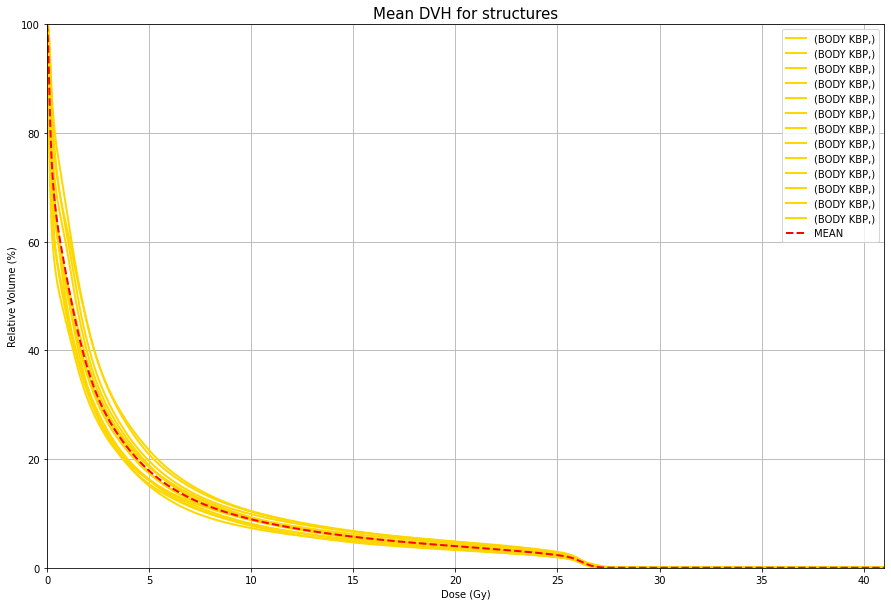

In [474]:
#1BODY KBP
#OKAY 1 ALL_ VS MEAN
ax=BODY_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_BODY_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_KBP_ALL.pdf')  

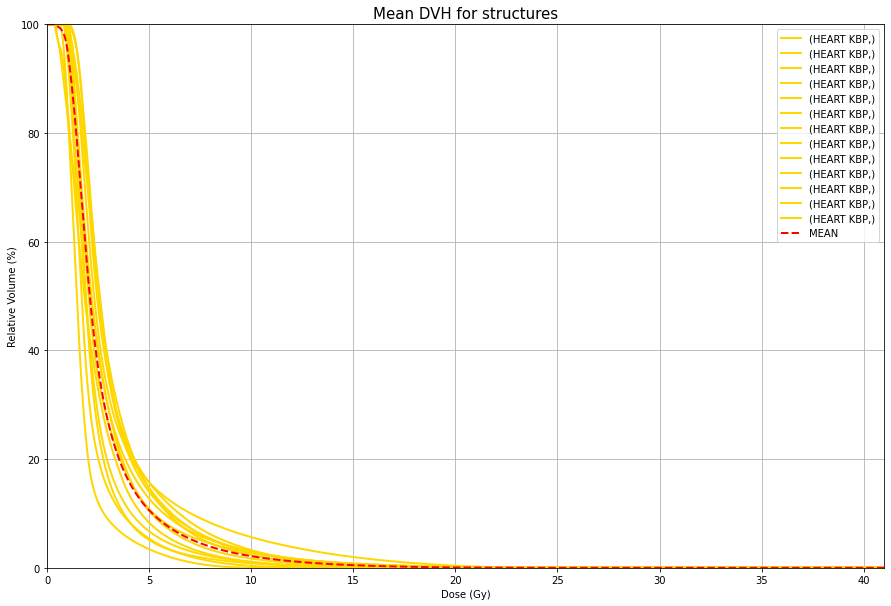

In [475]:
#2heart KBP
#OKAY 1 ALL_ VS MEAN
ax=HEART_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_HEART_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_KBP_ALL.pdf')  

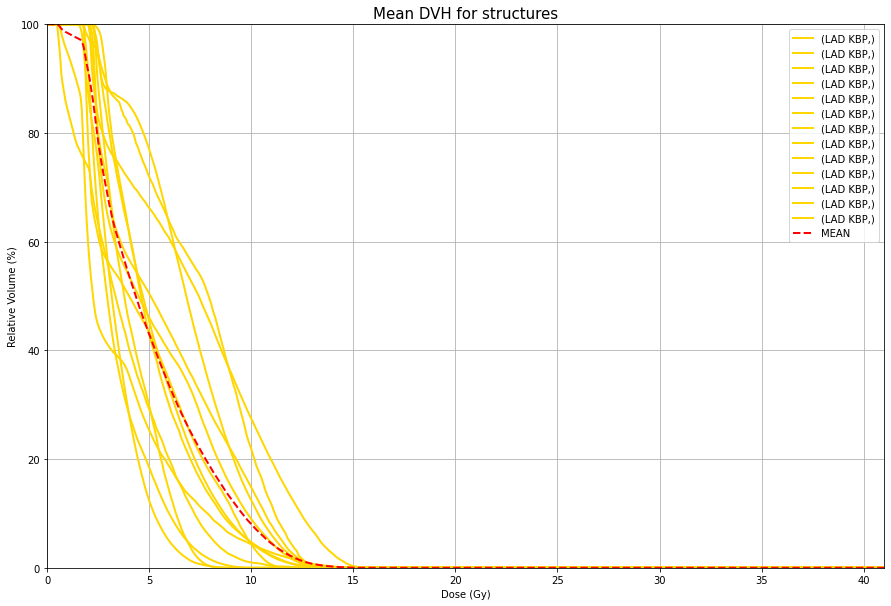

In [476]:
#3OKAY 1 ALL_ VS MEAN
#LAD KBP
ax=LAD_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_LAD_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_KBP_ALL.pdf')  

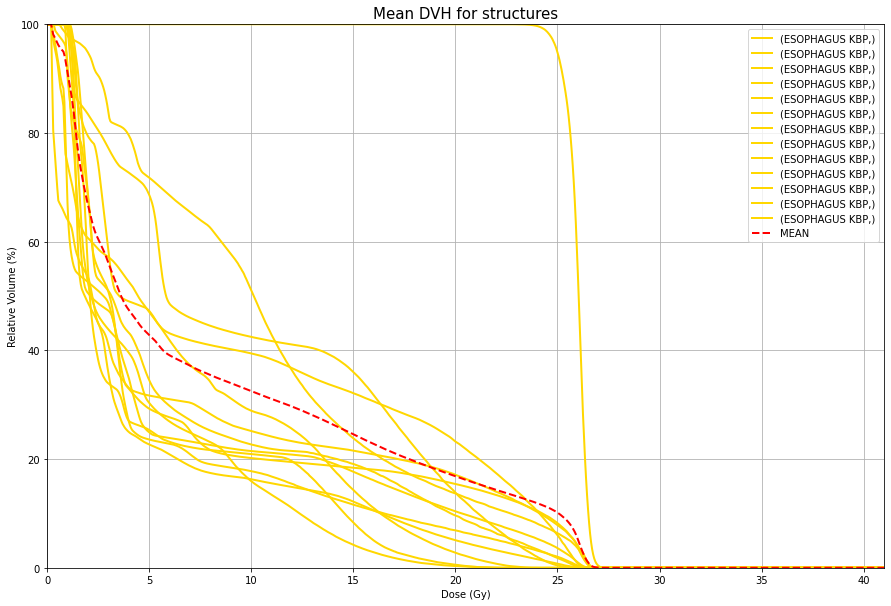

In [477]:
#4OKAY 1 ALL_ VS MEAN
#ESOPHAGUS KBP
ax=ESOPHAGUS_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_ESOPHAGUS_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS_KBP_ALL.pdf')  

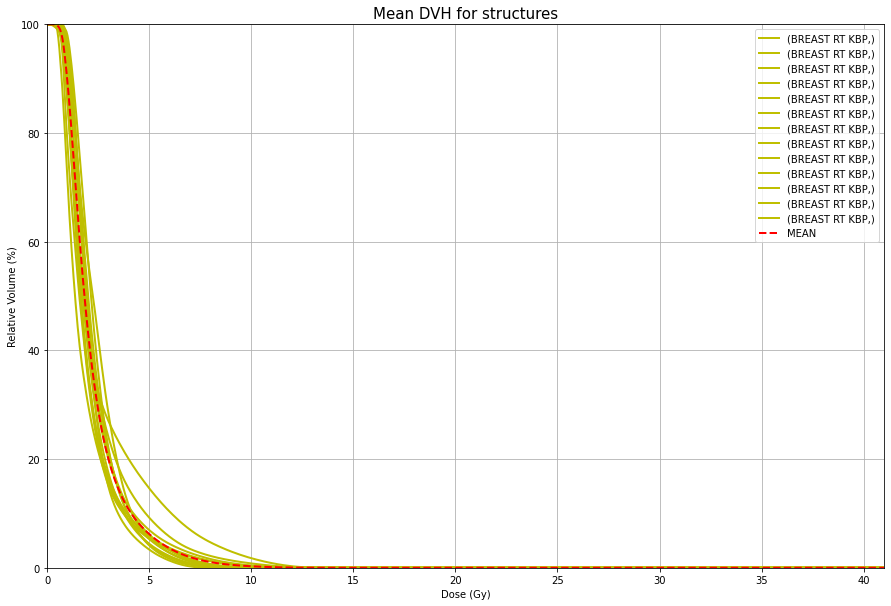

In [478]:
#OKAY 1 ALL_ VS MEAN
#5BREAST RT KBP
ax=BREASTRT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_BREASTRT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_KBP_ALL.pdf')  


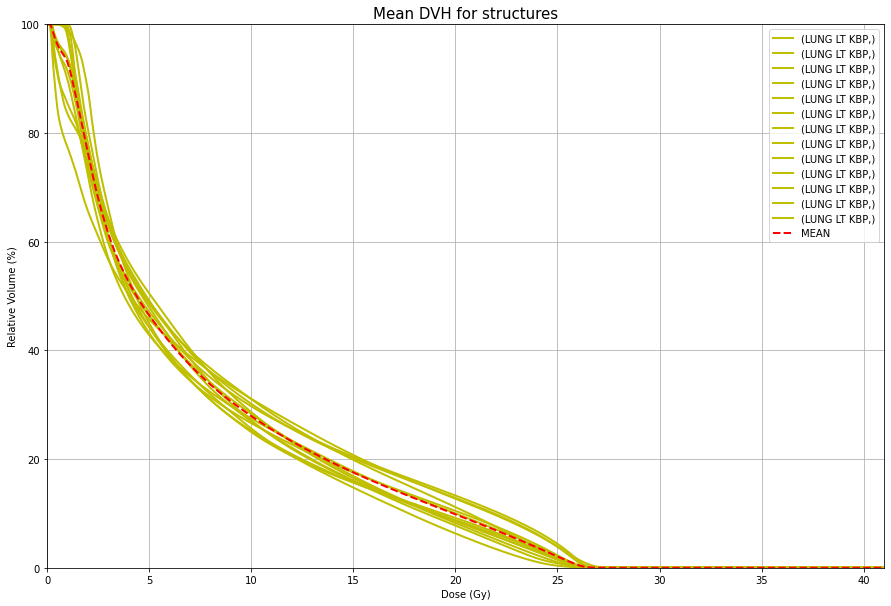

In [479]:
#6OKAY 1 ALL_ VS MEAN
#LUNG LT KBP
ax=LUNGLT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGLT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_KBP_ALL.pdf')  


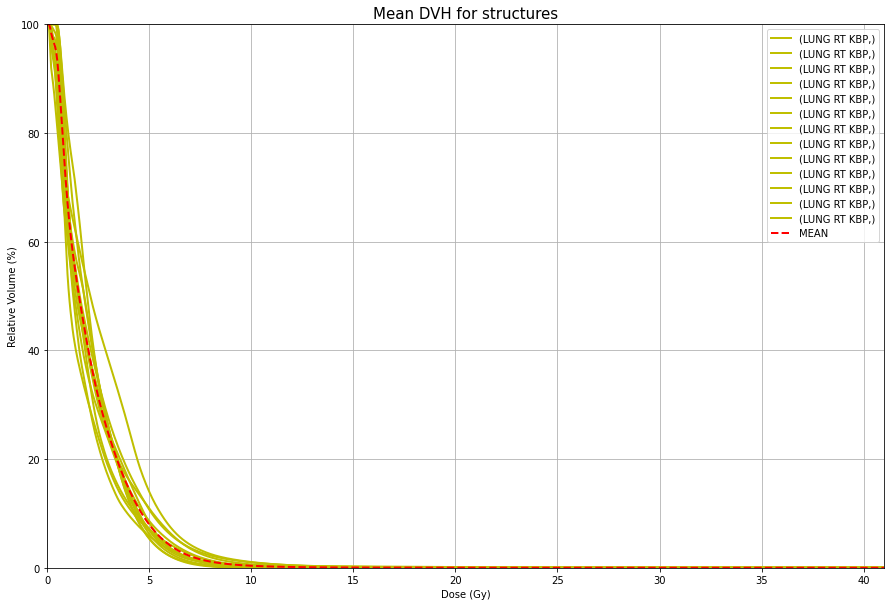

In [480]:
#7OKAY 1 ALL_ VS MEAN
#LUNG RT
ax=LUNGRT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGRT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_KBP_ALL.pdf')  


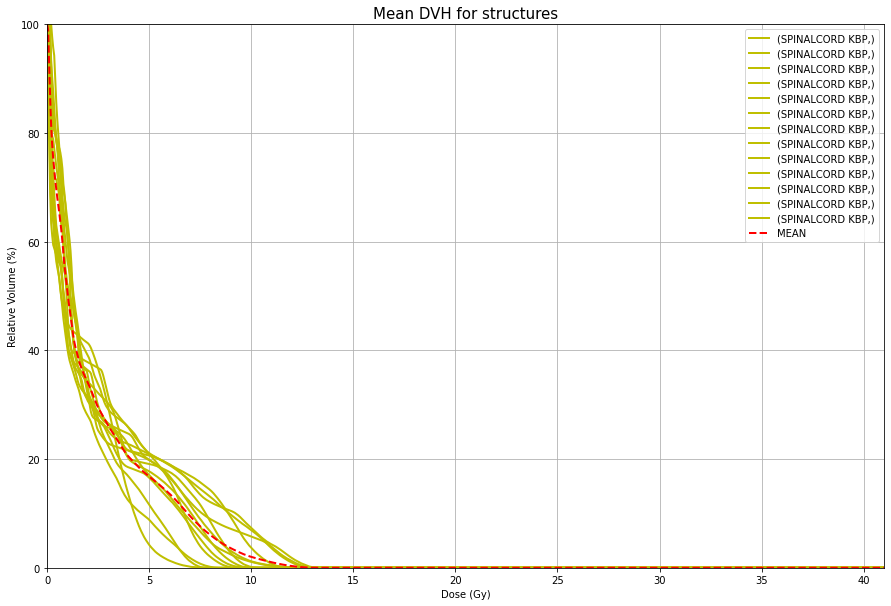

In [481]:
#8OKAY 1 ALL_ VS MEAN
#SPINALCORD KBP
ax=SPINALCORD_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_SPINALCORD_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_KBP_ALL.pdf')  


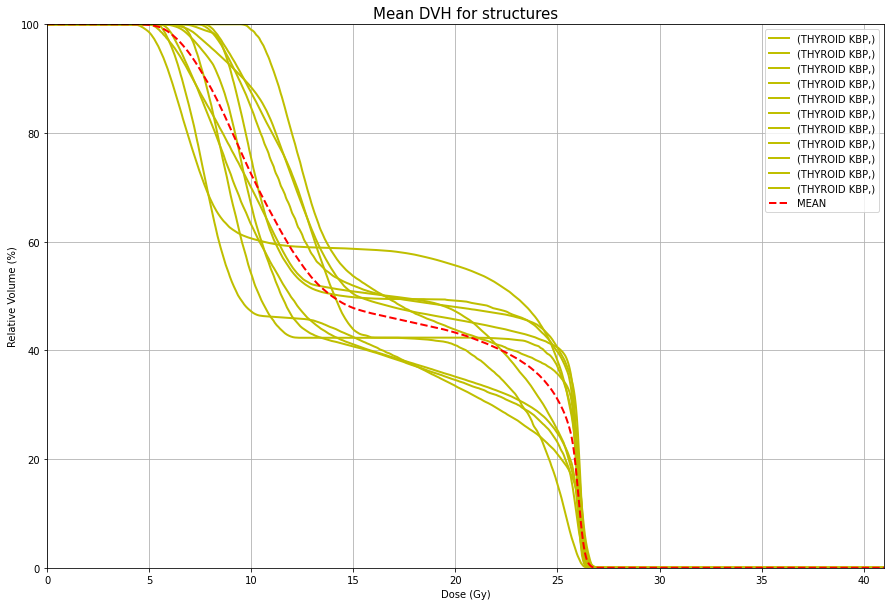

In [482]:
#9OKAY 1 ALL_ VS MEAN
#THYROID KBP
ax=THYROID_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_THYROID_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_KBP_ALL.pdf')  


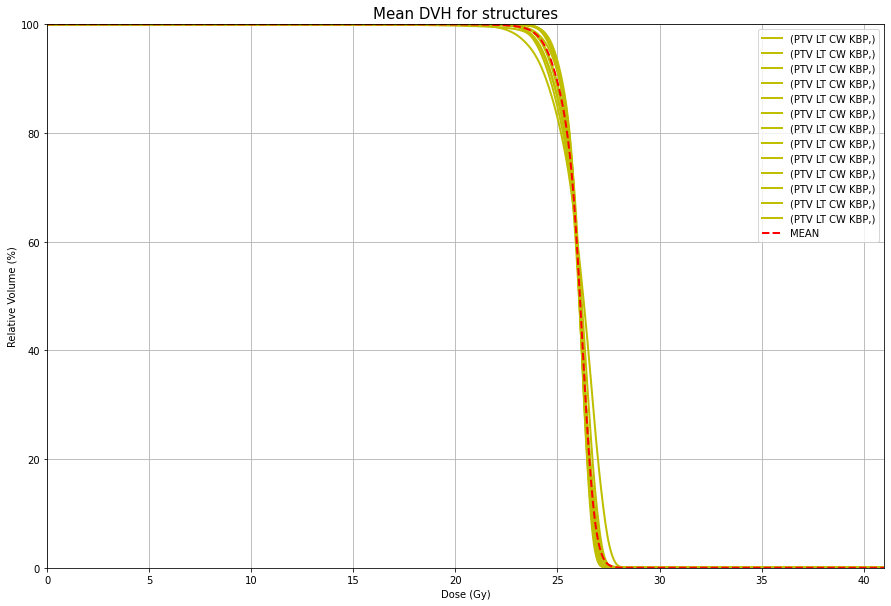

In [483]:
#10OKAY 1 ALL_ VS MEAN
#PTV LT CW KBP
ax=PTVLTCW_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTCW_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_KBP_ALL.pdf')  


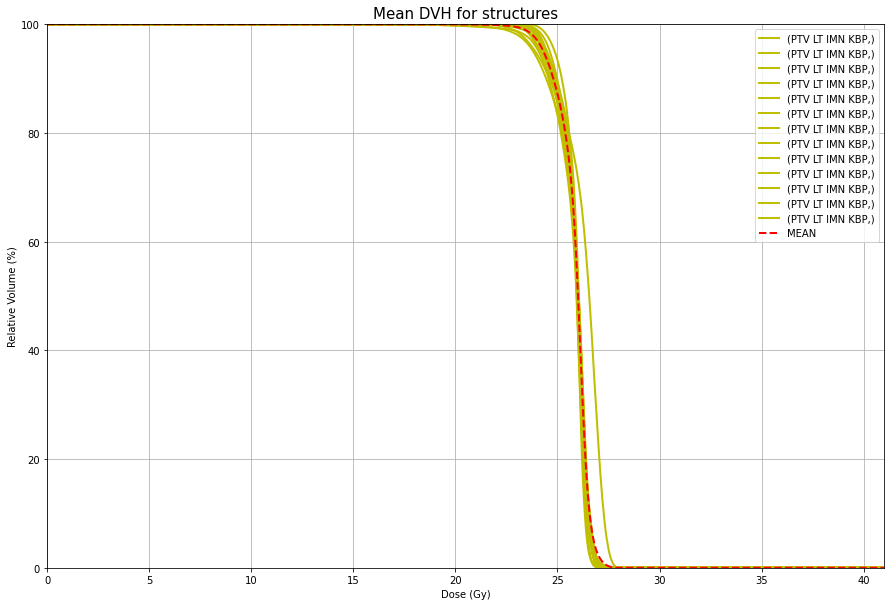

In [484]:
#11OKAY 1 ALL_ VS MEAN
#PTV LT IMN KBP
ax=PTVLTIMN_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTIMN_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_KBP_ALL.pdf')  


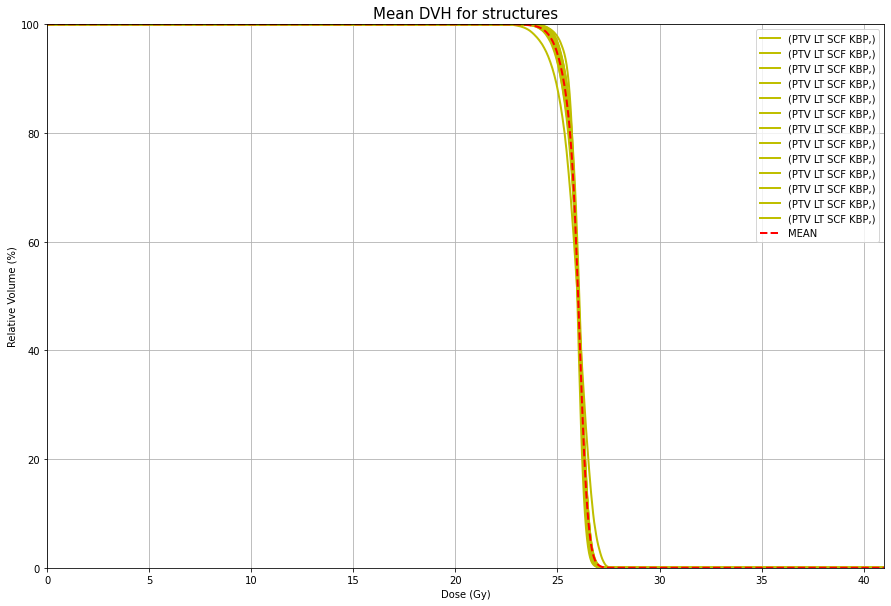

In [485]:
#12OKAY 1 ALL_ VS MEAN
#PTV LT SCF KBP
ax=PTVLTSCF_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTSCF_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_KBP_ALL.pdf')  


In [ ]:
df_HEART_cli

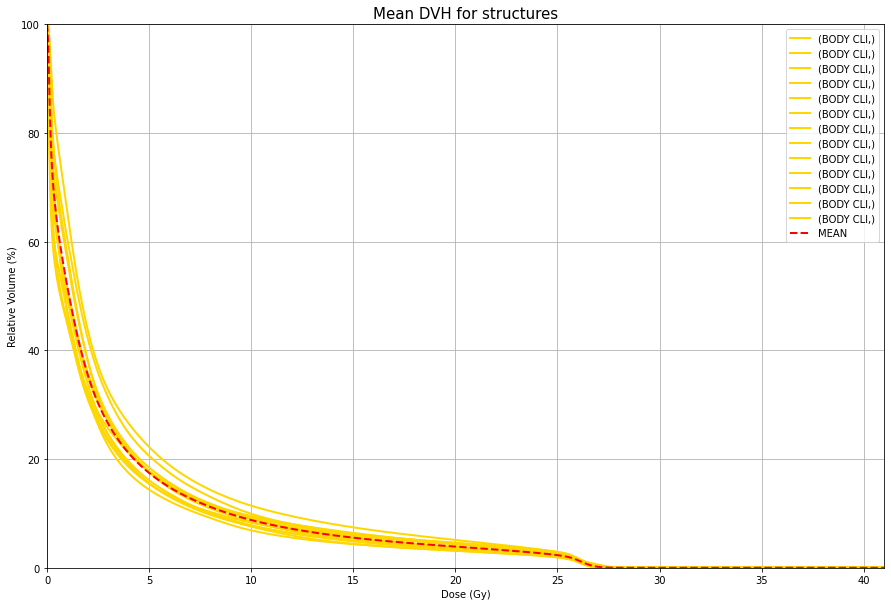

In [486]:
#1BODY CLI
#OKAY 1 ALL_ VS MEAN
ax=BODY_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_BODY_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_ALL.pdf')  

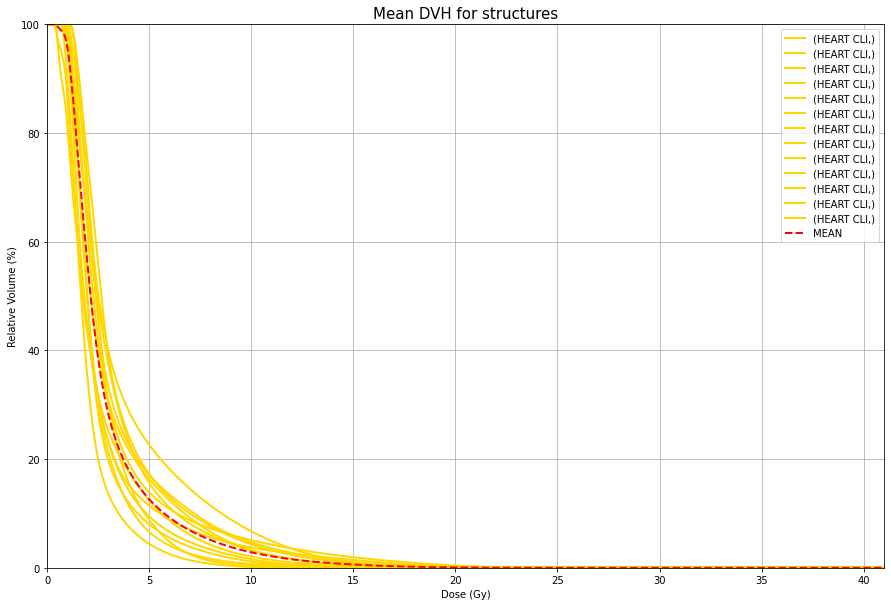

In [487]:
#2heart
#OKAY 1 ALL_ VS MEAN
ax=HEART_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_HEART_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_ALL.pdf')  

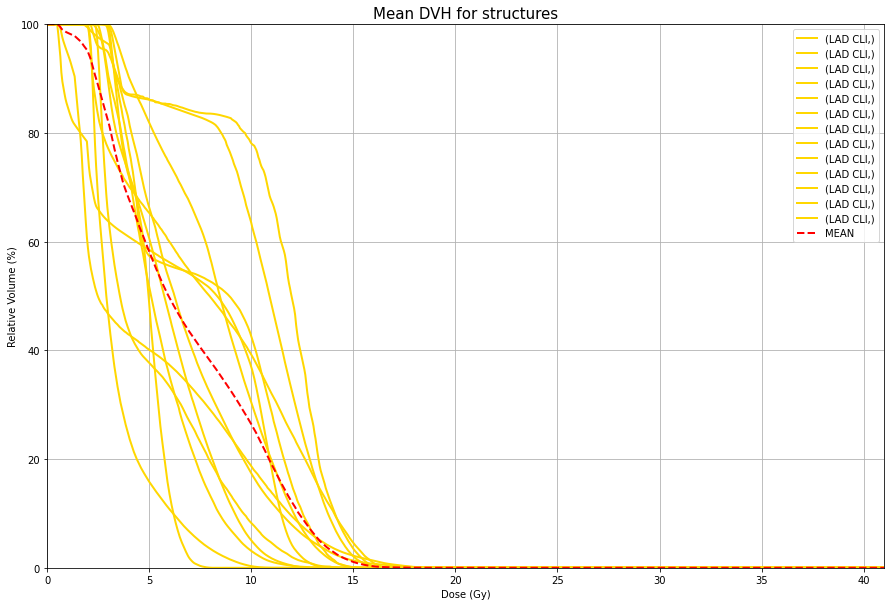

In [488]:
#3OKAY 1 ALL_ VS MEAN
#LAD
ax=LAD_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_LAD_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_ALL.pdf')  

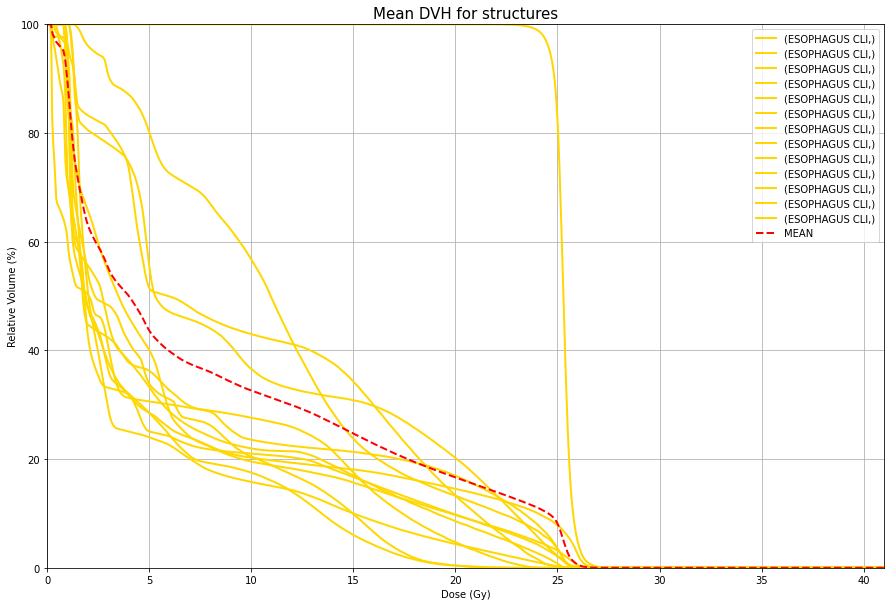

In [489]:
#4OKAY 1 ALL_ VS MEAN
#ESOPHAGUS
ax=ESOPHAGUS_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_ESOPHAGUS_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS.pdf')  

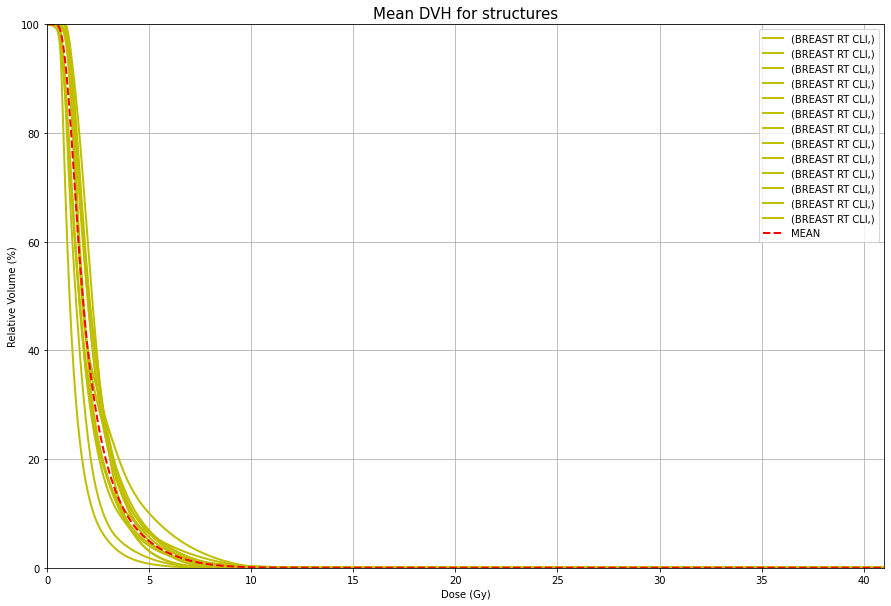

In [490]:
#OKAY 1 ALL_ VS MEAN
#5BREAST RT
ax=BREASTRT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_BREASTRT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_ALL.pdf')  


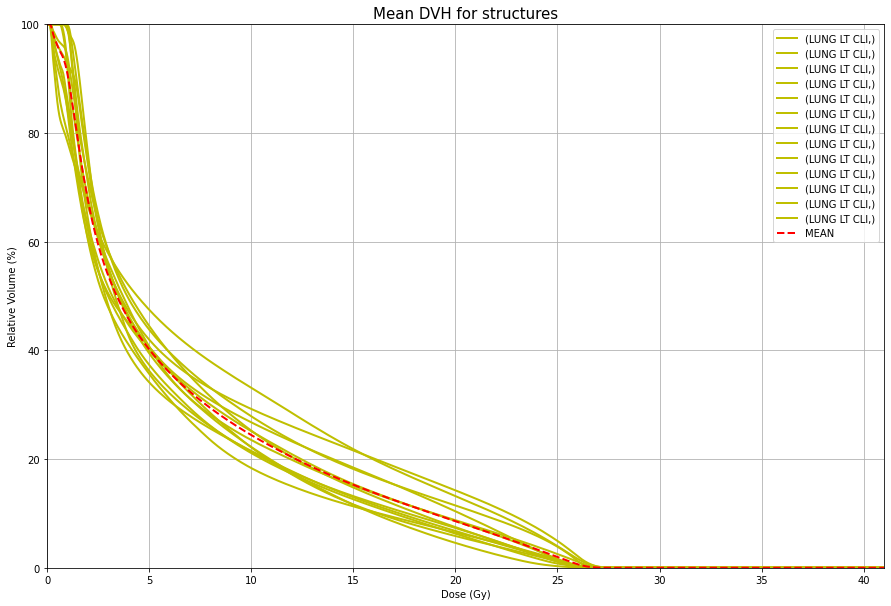

In [491]:
#6OKAY 1 ALL_ VS MEAN
#LUNG LT
ax=LUNGLT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGLT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_ALL.pdf')  


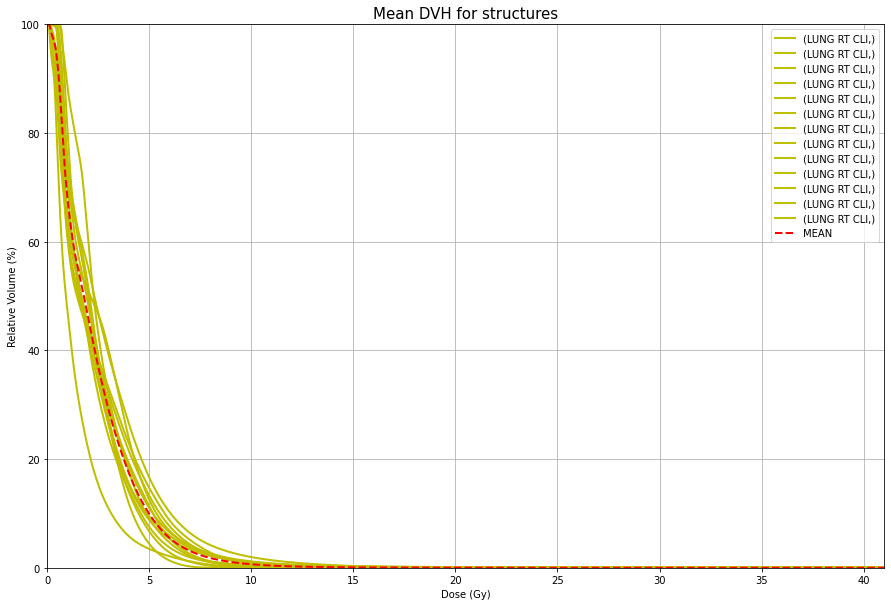

In [492]:
#7OKAY 1 ALL_ VS MEAN
#LUNG RT
ax=LUNGRT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGRT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_ALL.pdf')  


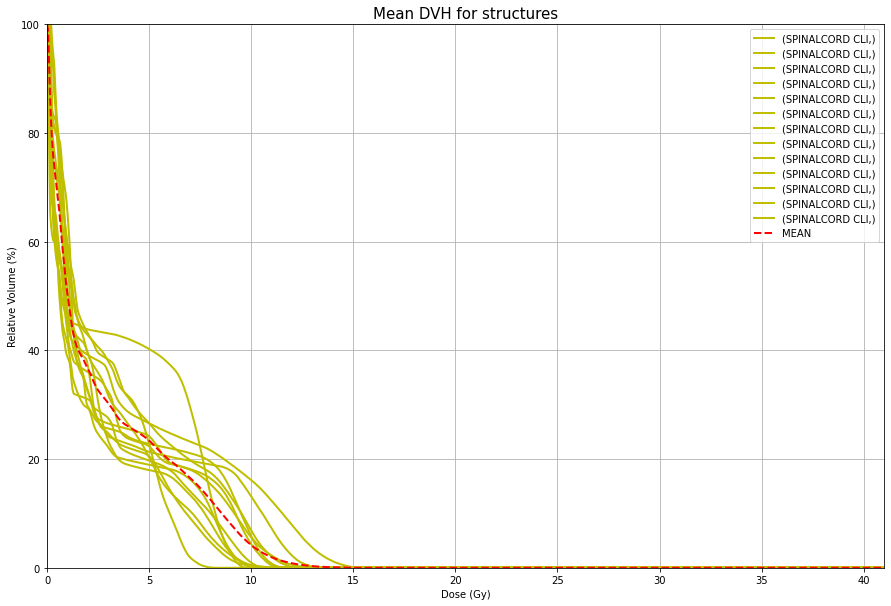

In [493]:
#8OKAY 1 ALL_ VS MEAN
#SPINALCORD
ax=SPINALCORD_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_SPINALCORD_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_ALL.pdf')  


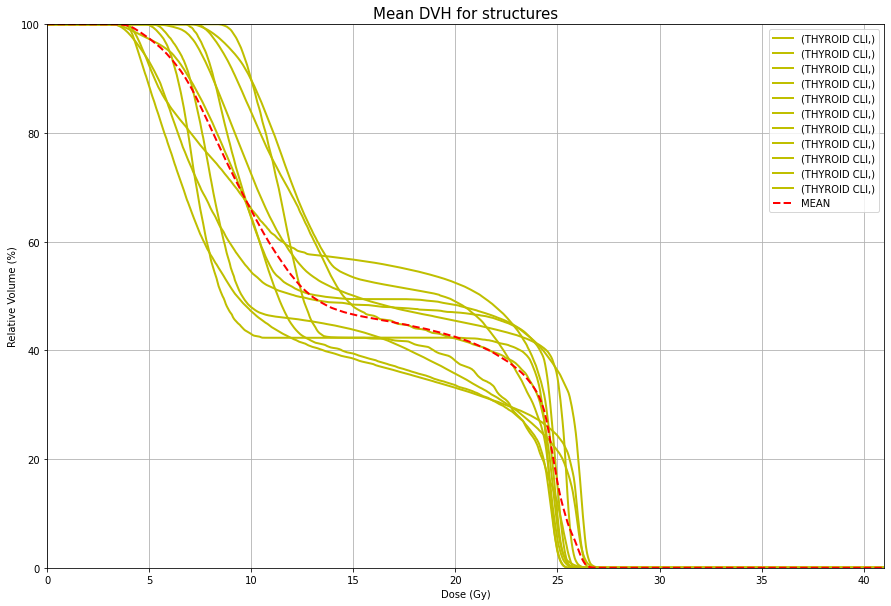

In [494]:
#9OKAY 1 ALL_ VS MEAN
#THYROID
ax=THYROID_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_THYROID_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_ALL.pdf')  


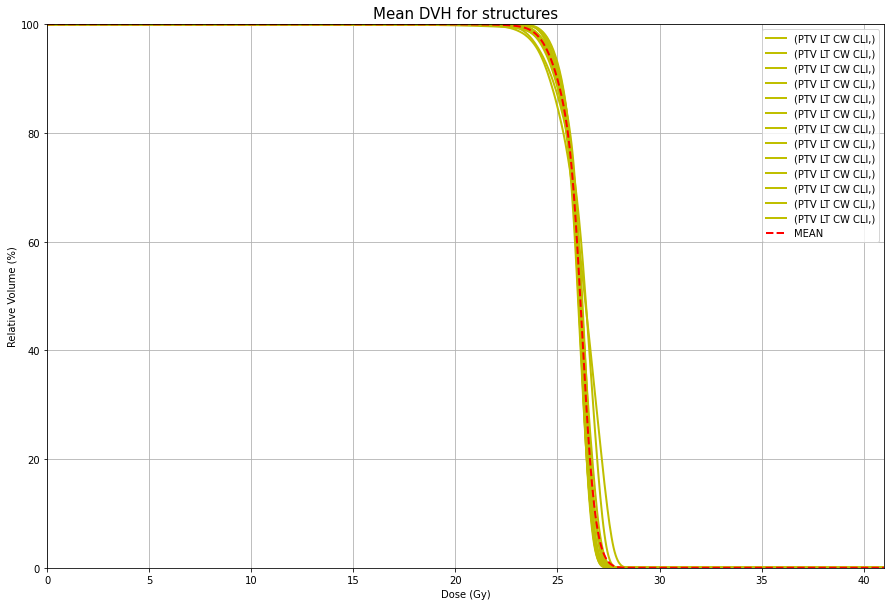

In [495]:
#10OKAY 1 ALL_ VS MEAN
#PTV LT CW
ax=PTVLTCW_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTCW_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_ALL.pdf')  


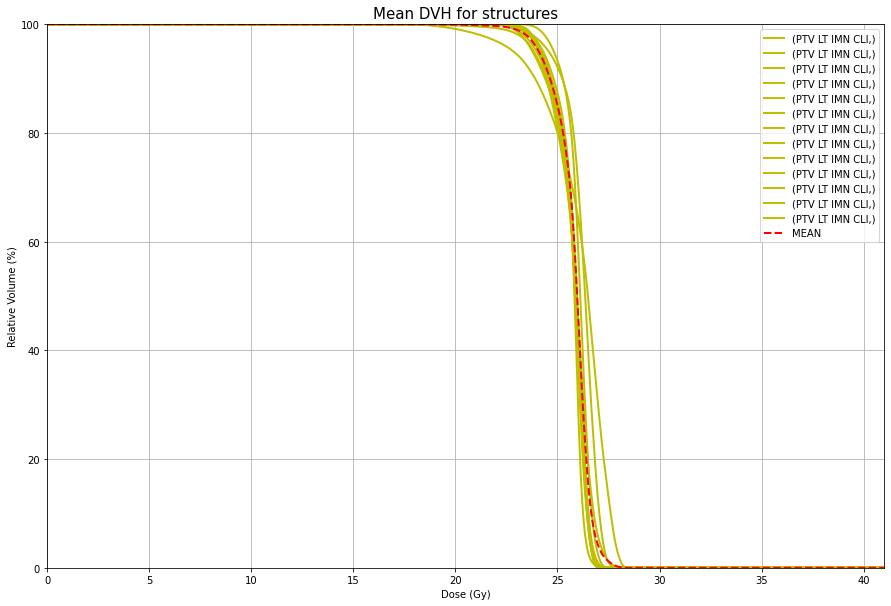

In [496]:
#11OKAY 1 ALL_ VS MEAN
#PTV LT IMN
ax=PTVLTIMN_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTIMN_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_ALL.pdf')  


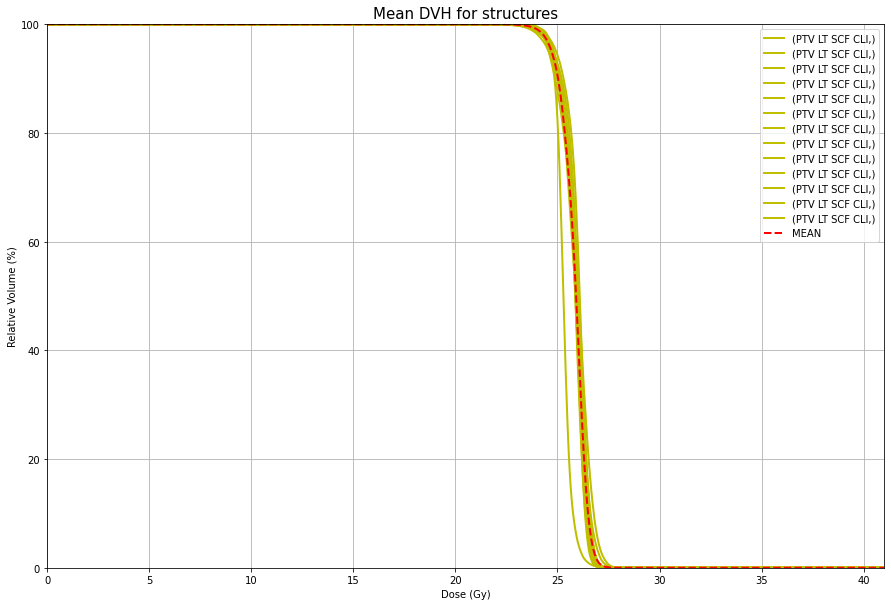

In [497]:
#12OKAY 1 ALL_ VS MEAN
#PTV LT SCF
ax=PTVLTSCF_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTSCF_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_ALL.pdf')  


NEXT SINGLE ORGAN


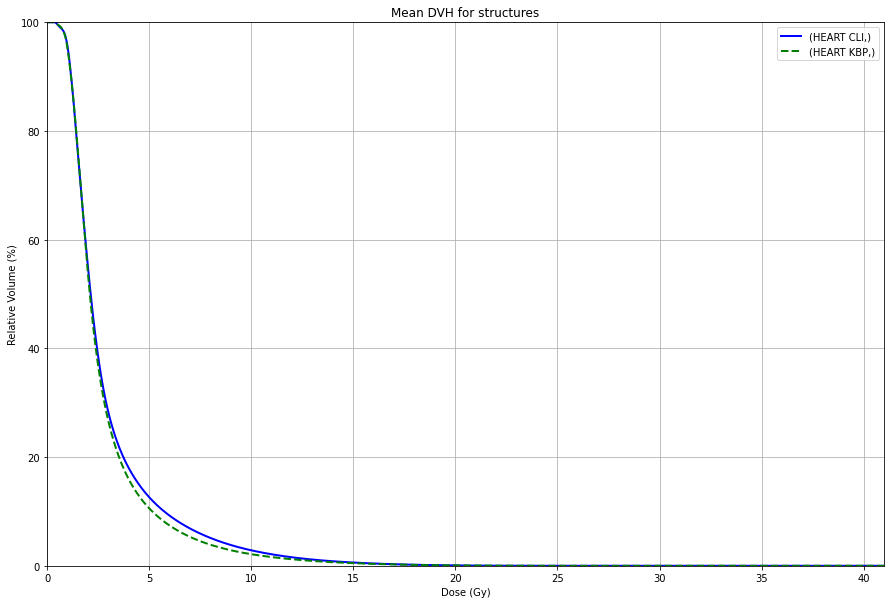

In [498]:
#OKAY PLOT EACH ORGANS
#1 HEART
ax=df_HEART_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_HEART_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_MEAN_CMPR.pdf')


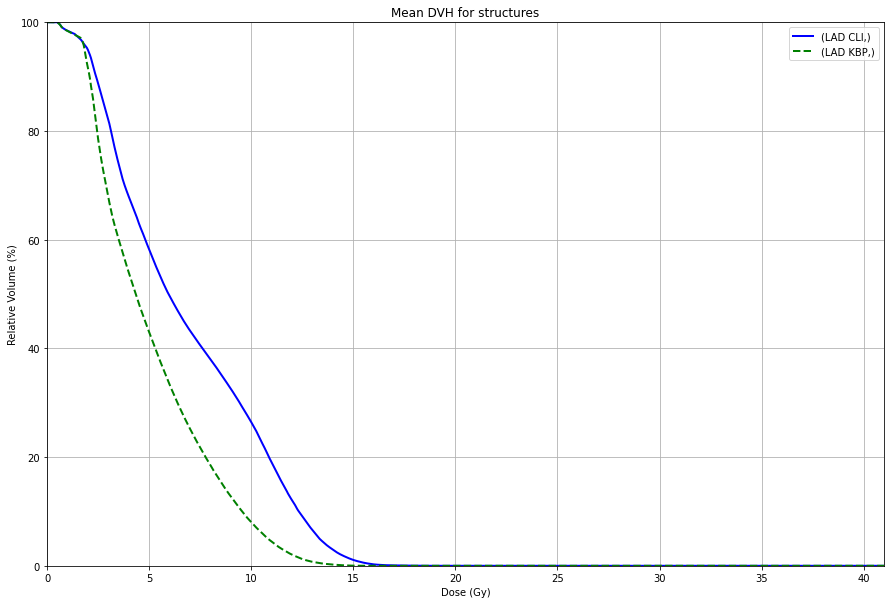

In [499]:
#OKAY PLOT EACH ORGANS
#2 LAD
ax=df_LAD_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LAD_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_MEAN_CMPR.pdf')

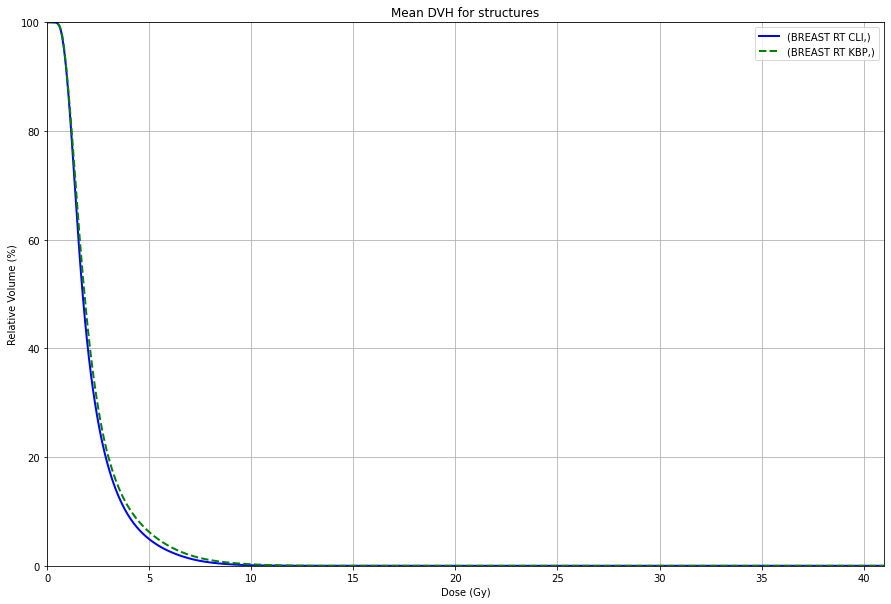

In [500]:
#OKAY PLOT EACH ORGANS
#3 BREAST RT
ax=df_BREASTRT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_BREASTRT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_MEAN_CMPR.pdf')

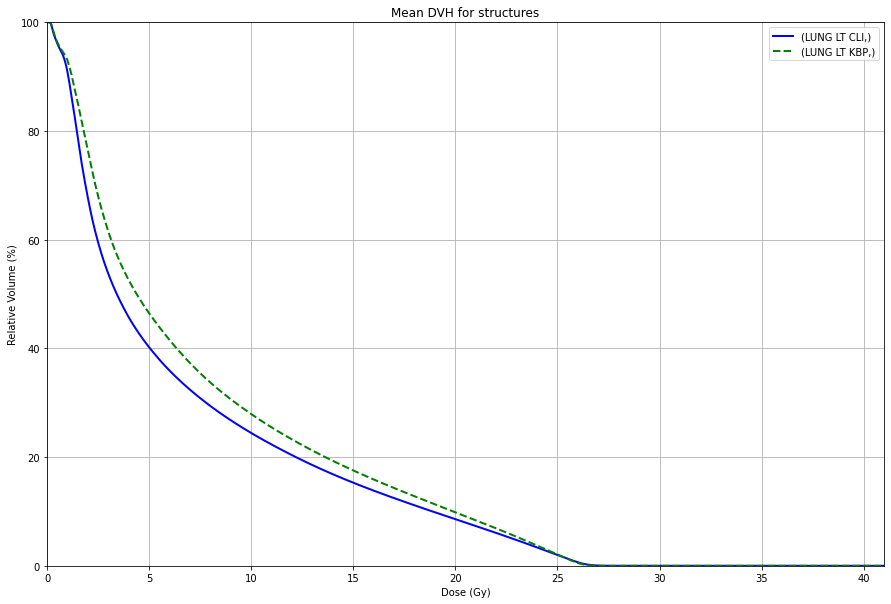

In [501]:
#OKAY PLOT EACH ORGANS
#4 LUNG LT
ax=df_LUNGLT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LUNGLT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_MEAN_CMPR.pdf')

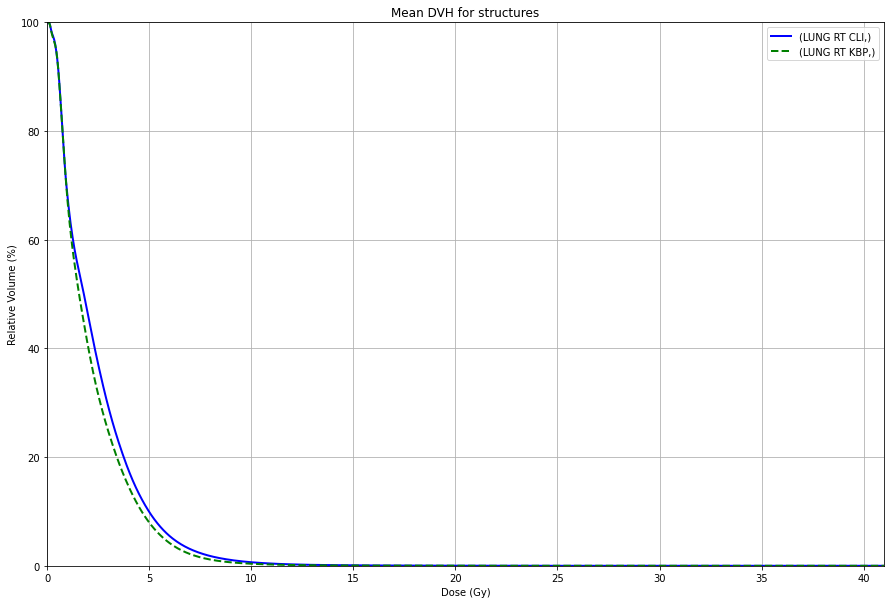

In [502]:
#OKAY PLOT EACH ORGANS
#5 LUNG RT
ax=df_LUNGRT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LUNGRT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_MEAN_CMPR.pdf')

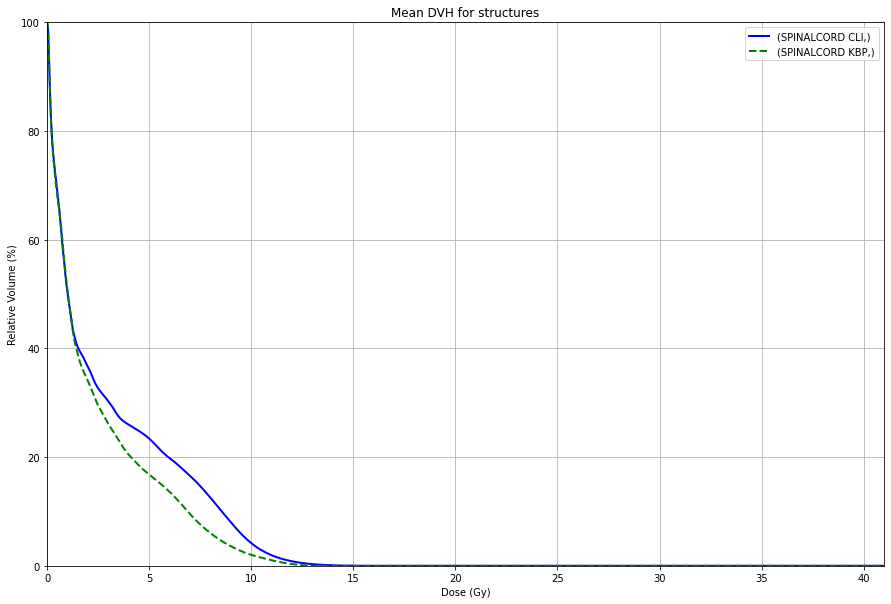

In [503]:
#OKAY PLOT EACH ORGANS
#6 SPINALCORD
ax=df_SPINALCORD_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_SPINALCORD_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_MEAN_CMPR.pdf')

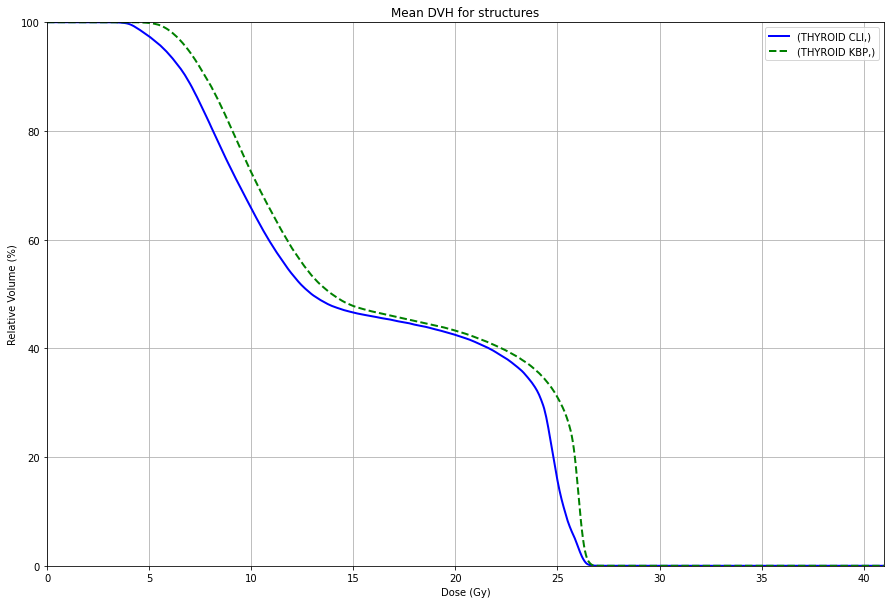

In [504]:
#OKAY PLOT EACH ORGANS
#8 THYROID
ax=df_THYROID_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_THYROID_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_MEAN_CMPR.pdf')

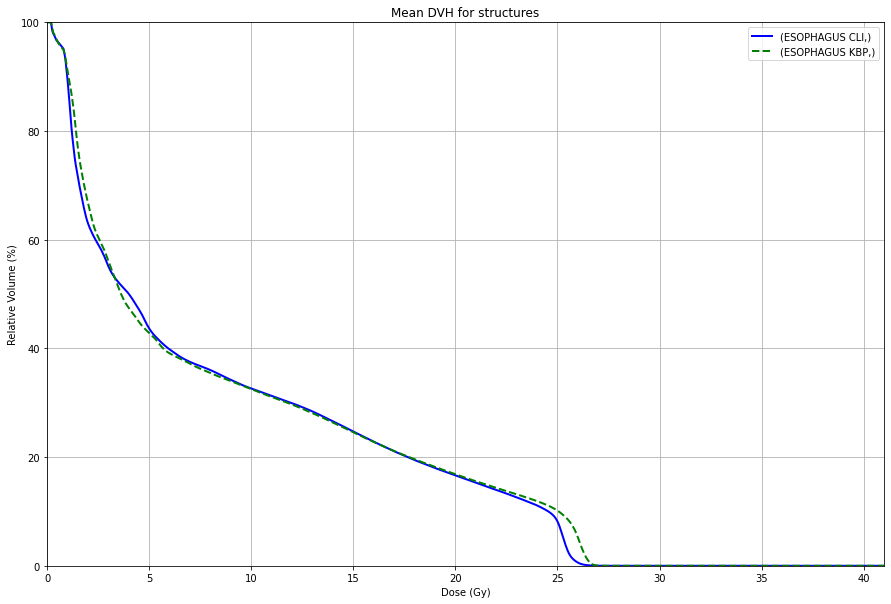

In [505]:
#OKAY PLOT EACH ORGANS
#9 ESOPHAGUS
ax=df_ESOPHAGUS_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_ESOPHAGUS_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS_MEAN_CMPR.pdf')

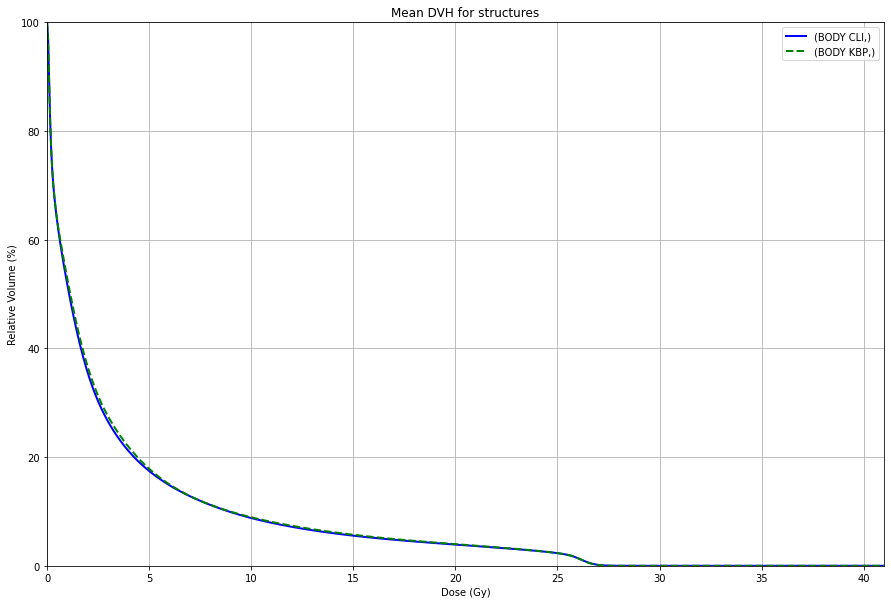

In [506]:
#OKAY PLOT EACH ORGANS
#9 BODY
ax=df_BODY_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_BODY_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_MEAN_CMPR.pdf')

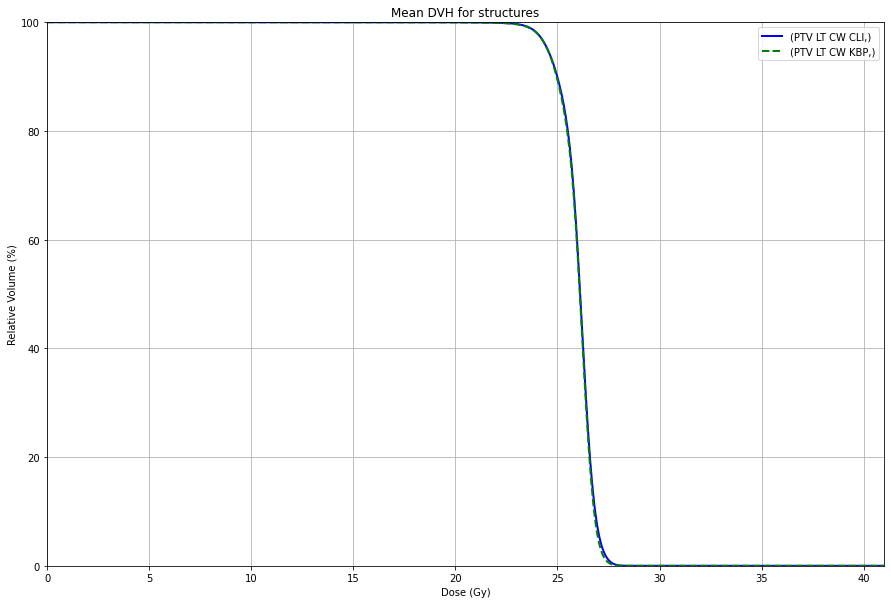

In [507]:
#OKAY PLOT EACH ORGANS
#10 PTV LT CW
ax=df_PTVLTCW_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTCW_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_MEAN_CMPR.pdf')

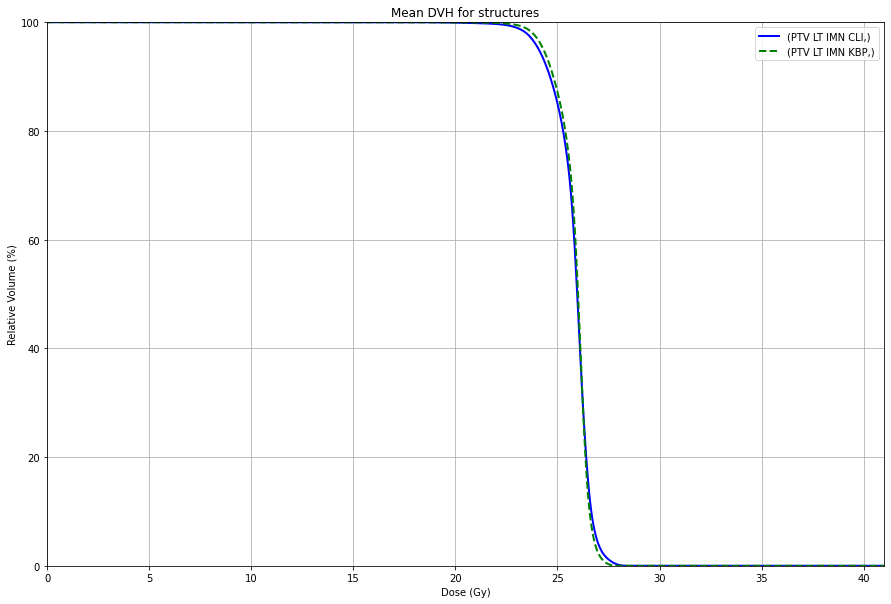

In [508]:
#OKAY PLOT EACH ORGANS
#11 PTV LT IMN
ax=df_PTVLTIMN_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTIMN_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_MEAN_CMPR.pdf')

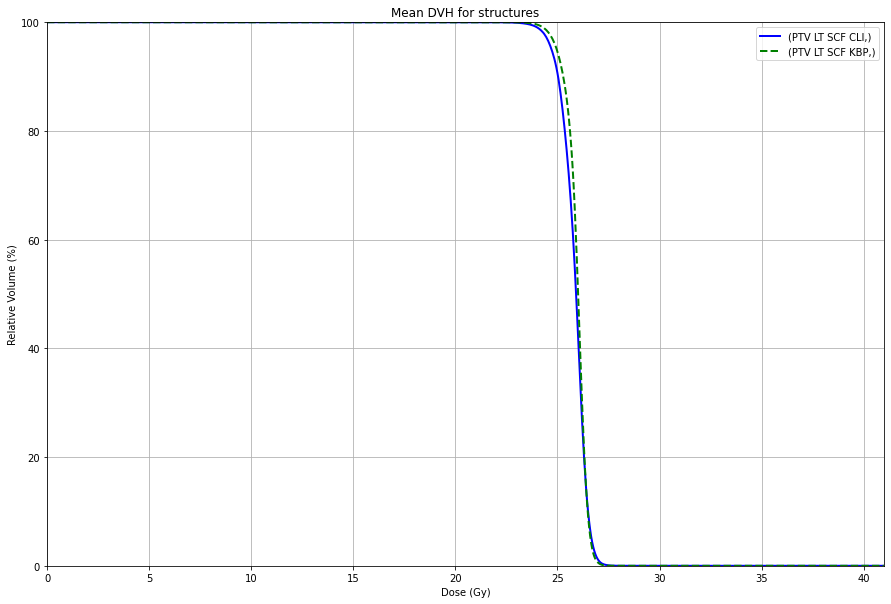

In [509]:
#OKAY PLOT EACH ORGANS
#12 PTV LT SCF
ax=df_PTVLTSCF_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTSCF_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_MEAN_CMPR.pdf')

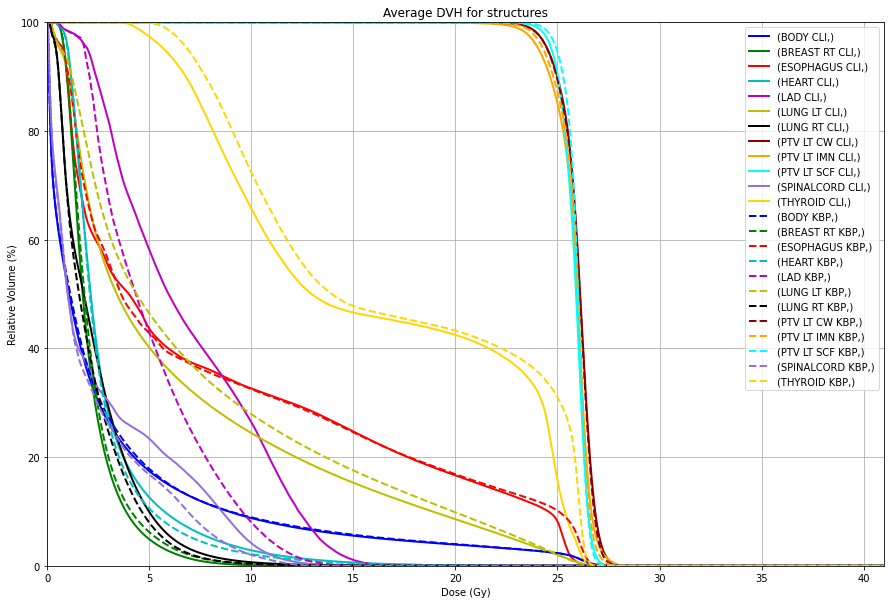

In [510]:
#OKAY PLOT SUMMARY
ax=df_cli_mean.plot(figsize=(15,10),markevery=25,color=my_colors,linewidth=2.0)
df_kbp_mean.plot(ax=ax,markevery=25,linewidth=2.0,color=my_colors,linestyle='dashed')
plt.title('Average DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SUMMARY_MEAN_KBP_VS_CLI.pdf')

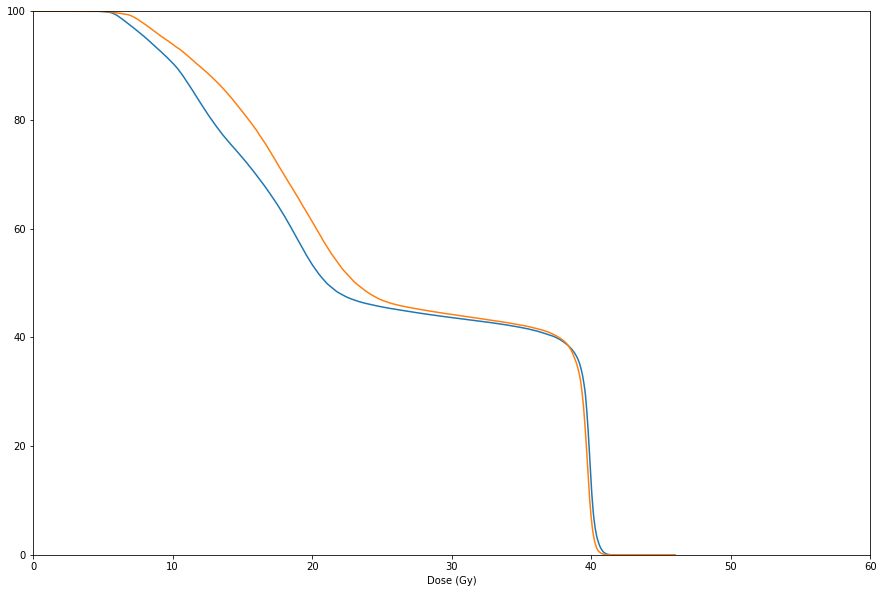

In [ ]:
fig = plt.figure()

for frame in [df_THYROID_cli,df_THYROID_kbp]:
    frame.plot(figsize=(15,10))

plt.xlim(0,60)
plt.ylim(0,100)
plt.show()

ACTUAL PROGRAM